In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from numpy import log
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import pacf
from keras.models import Sequential
from keras.layers.core import Dense, Activation
import keras
import math
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dense
from statsmodels.tsa.stattools import pacf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense



import warnings
warnings.filterwarnings('ignore')

In [3]:
STOCK = "Amazon"
dataset = pd.read_csv('../Datasets/amazon_stock.csv')
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Date
0,4.075000,4.478125,3.952344,4.468750,4.468750,322352000,2000-01-03
1,4.268750,4.575000,4.087500,4.096875,4.096875,349748000,2000-01-04
2,3.525000,3.756250,3.400000,3.487500,3.487500,769148000,2000-01-05
3,3.565625,3.634375,3.200000,3.278125,3.278125,375040000,2000-01-06
4,3.350000,3.525000,3.309375,3.478125,3.478125,210108000,2000-01-07


In [4]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5839.000000,5839.000000,5839.000000,5839.000000,5839.000000,5.839000e+03
mean,34.865886,35.280858,34.410312,34.853440,34.853440,1.239786e+08
std,49.577395,50.162208,48.924149,49.540404,49.540404,9.910548e+07
min,0.295500,0.305000,0.275500,0.298500,0.298500,1.762600e+07
25%,2.209188,2.252750,2.175000,2.221500,2.221500,6.798200e+07
50%,9.449500,9.570000,9.285500,9.437500,9.437500,1.015480e+08
75%,47.835499,48.138500,47.507500,47.833000,47.833000,1.479700e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


In [5]:
dataset.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date         0
dtype: int64

In [6]:
start_date = pd.to_datetime(dataset.Date[0])
end_date = pd.to_datetime(dataset.Date.values[-1])
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [7]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume,Date
5834,89.970001,94.019997,88.120003,92.430000,92.430000,72397100,2023-03-13
5835,93.830002,95.070000,92.709999,94.879997,94.879997,60912700,2023-03-14
5836,93.220001,96.669998,93.070000,96.199997,96.199997,70731800,2023-03-15
5837,95.750000,100.989998,95.610001,100.040001,100.040001,84446900,2023-03-16
5838,99.790001,100.660004,97.459999,98.949997,98.949997,87173200,2023-03-17


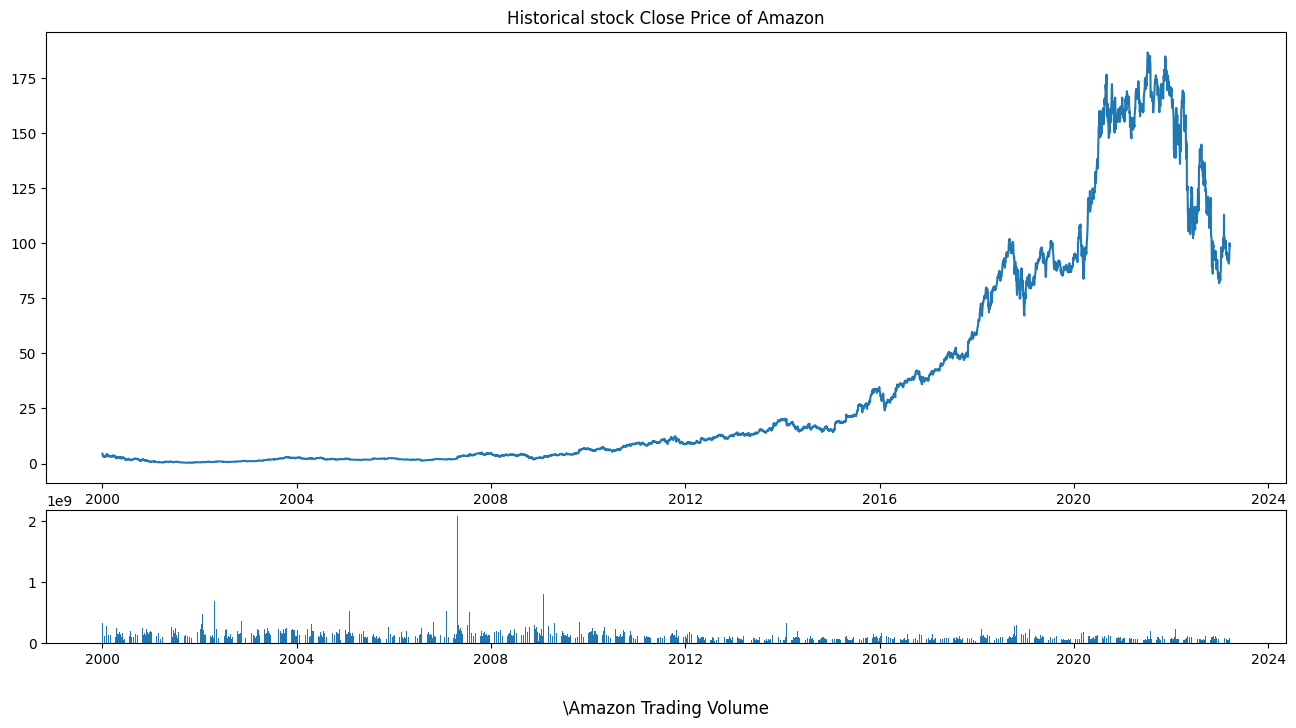

In [8]:
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan = 3, colspan = 4)
top_plt.plot(dataset.Date, dataset["Close"])
plt.title('Historical stock Close Price of ' + STOCK)
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan = 1, colspan = 4)
bottom_plt.bar(dataset.Date, dataset['Volume'])
plt.title('{} Trading Volume'.format(STOCK), y = -0.60)
plt.gcf().set_size_inches(16,10)

<Axes: >

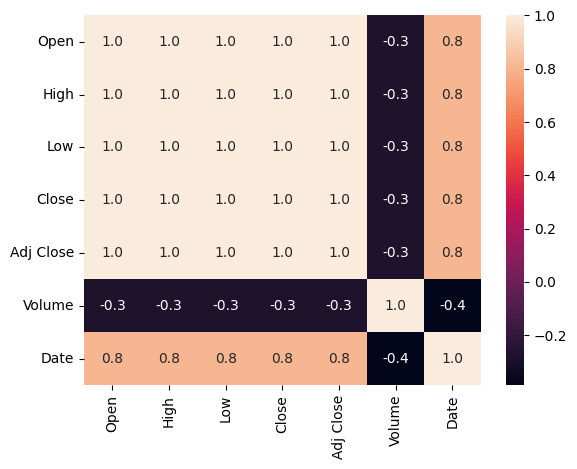

In [9]:
# plotting correlation heatmap
sns.heatmap(dataset.corr(), annot = True, fmt = ".1f")

In [10]:
dataset2 = dataset[['Close', 'Volume']]
dataset2.head()

,Close,Volume
0,4.468750,322352000
1,4.096875,349748000
2,3.487500,769148000
3,3.278125,375040000
4,3.478125,210108000


In [11]:
result = adfuller(dataset2.Close.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.510401984764183
p-value: 0.8899705844972059
Critial Values:
   1%, -3.4314771871987184
Critial Values:
   5%, -2.8620381100423002
Critial Values:
   10%, -2.567035141967017


In [12]:
result = kpss(dataset2['Close'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}');


KPSS Statistic: 8.974667
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


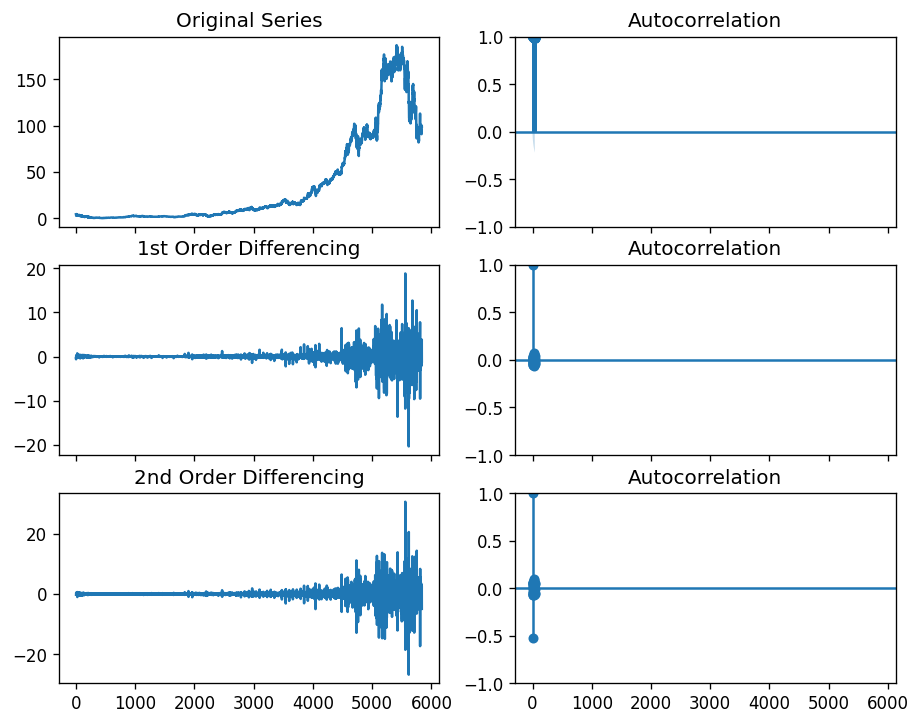

In [13]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(dataset2['Close'].values); axes[0, 0].set_title('Original Series')
plot_acf(dataset2['Close'].values, ax = axes[0, 1])

# 1st Differencing
axes[1, 0].plot(dataset2['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dataset2['Close'].diff().dropna(), ax = axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(dataset2['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dataset2['Close'].diff().diff().dropna(), ax = axes[2, 1])

plt.show()

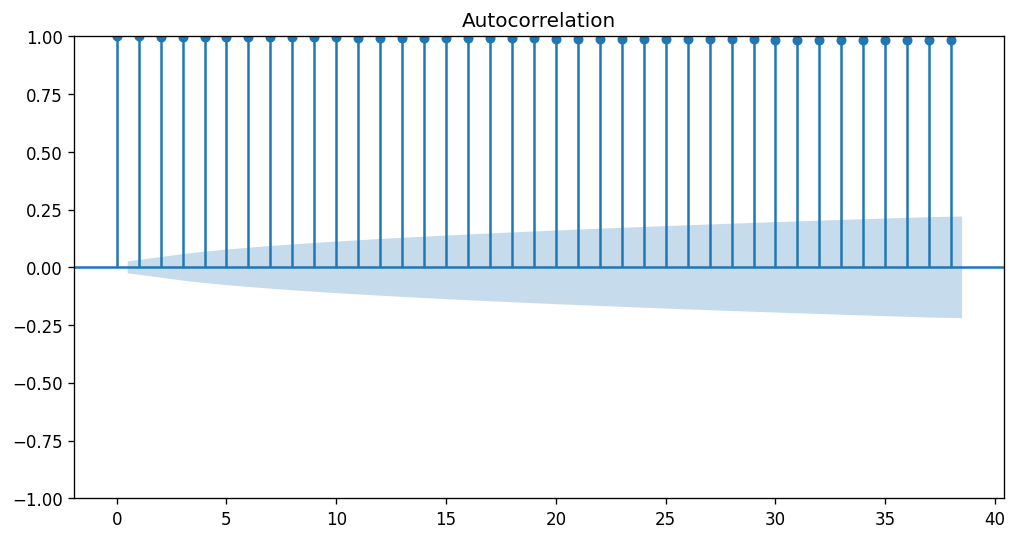

In [14]:
plt.rc("figure", figsize = (10,5))
plot_acf(dataset2['Close'])
print()

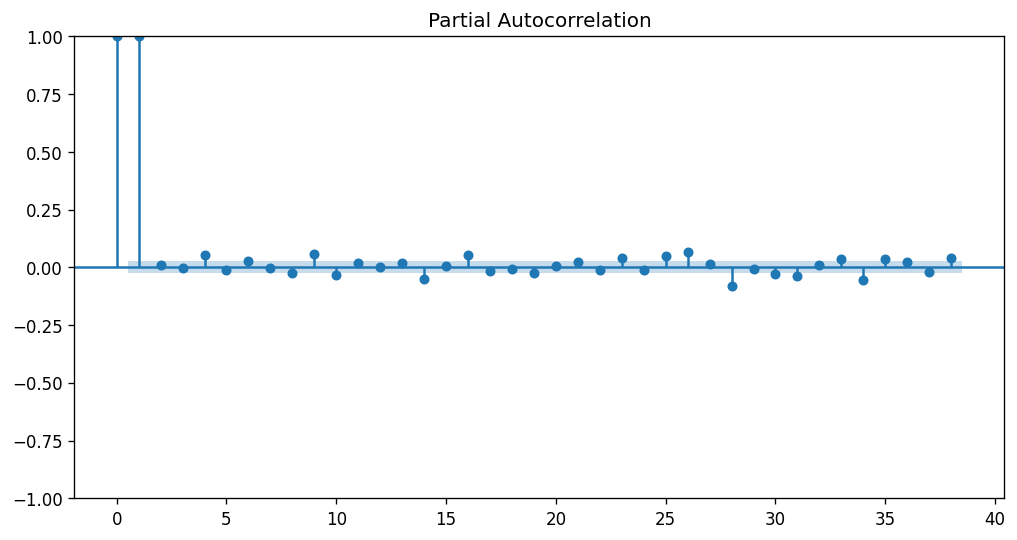

In [15]:
plt.rc("figure", figsize=(10,5))
plot_pacf(dataset2['Close'])
print()

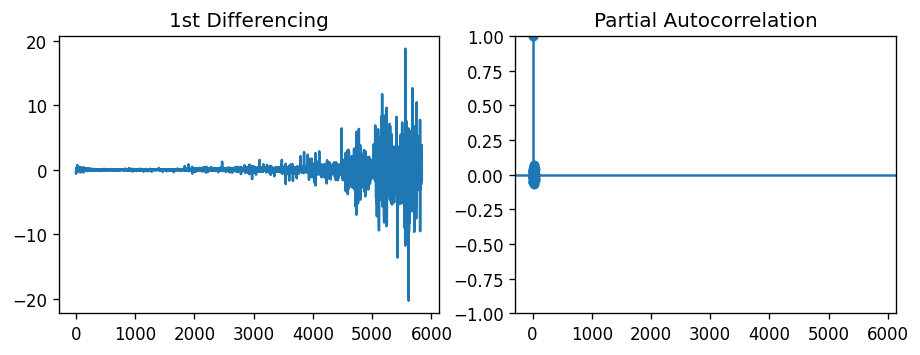

In [16]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(dataset2['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim = (0,5))
plot_pacf(dataset2['Close'].diff().dropna(), ax = axes[1])

plt.show()

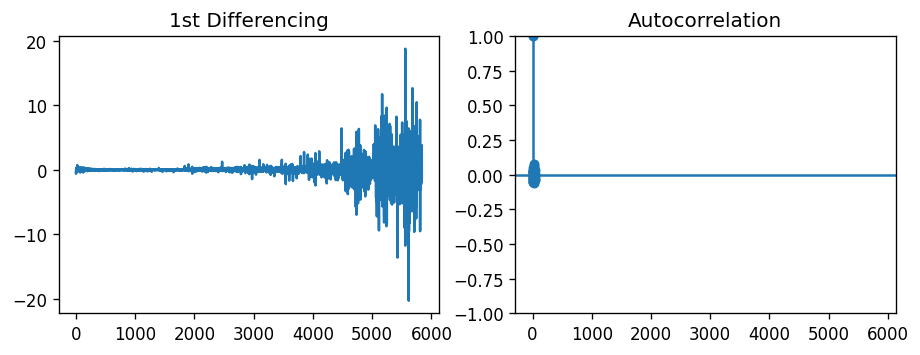

In [17]:
fig, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(dataset2['Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim = (0,1.2))
plot_acf(dataset2['Close'].diff().dropna(), ax=axes[1])

plt.show()

In [18]:
data = dataset2['Close'].values
print('Length of Total data: ', len(data))
train_length = int(len(data) * 0.8)
train_data = data[:train_length]
test_data = data[train_length:]
print('Train and Test data length: ', len(train_data), len(test_data))

Length of Total data:  5839
Train and Test data length:  4671 1168


In [19]:
model = ARIMA(train_data, order = (1,0,8))
model_fit = model.fit(low_memory = False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4671
Model:                 ARIMA(1, 0, 8)   Log Likelihood               -1840.648
Date:                Wed, 12 Apr 2023   AIC                           3703.296
Time:                        15:24:25   BIC                           3774.236
Sample:                             0   HQIC                          3728.245
                               - 4671                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9138    299.451      0.043      0.966    -574.000     599.827
ar.L1          1.0000   7.44e-05   1.34e+04      0.000       1.000       1.000
ma.L1          0.0059      0.005      1.147      0.2

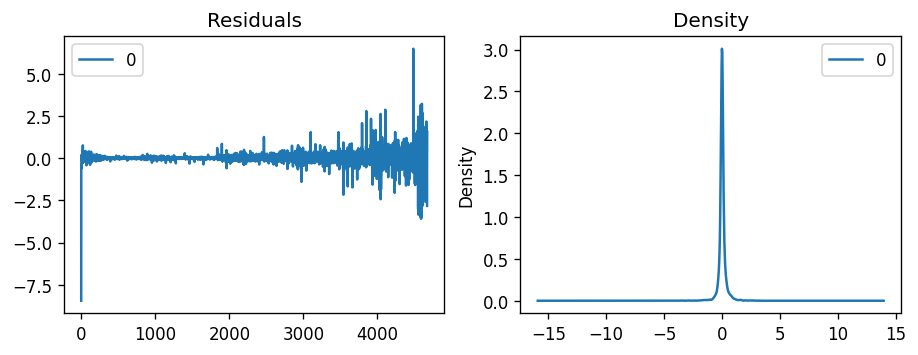

In [20]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title = "Residuals", ax = ax[0])
residuals.plot(kind = 'kde', title = 'Density', ax = ax[1])
plt.show()

In [21]:
# Forecast
forecast_result = model_fit.forecast(150, alpha = 0.05)  # 95% conf
forecast_result[:30]

array([90.23431514, 90.05245075, 90.13897272, 90.29826255, 90.40756079,
       90.2580369 , 90.12692755, 90.1882607 , 90.1863625 , 90.18446435,
       90.18256624, 90.18066818, 90.17877017, 90.1768722 , 90.17497428,
       90.17307641, 90.17117858, 90.1692808 , 90.16738306, 90.16548538,
       90.16358774, 90.16169014, 90.15979259, 90.15789509, 90.15599764,
       90.15410023, 90.15220287, 90.15030556, 90.14840829, 90.14651107])

In [22]:
test_data[:30]

array([ 90.8635025 ,  88.96099854,  88.87200165,  89.85849762,
        91.71649933,  91.16449738,  92.38749695,  93.12400055,
        94.3259964 ,  94.9260025 ,  94.31500244,  94.80999756,
        95.98249817,  94.1309967 ,  94.3259964 ,  94.11100006,
        93.83550262,  94.17099762,  95.24500275,  95.14499664,
        95.26950073,  96.38400269,  96.64099884,  99.90499878,
       100.1190033 , 100.63549805, 101.97550201,  99.74099731,
        97.91549683,  97.60350037])

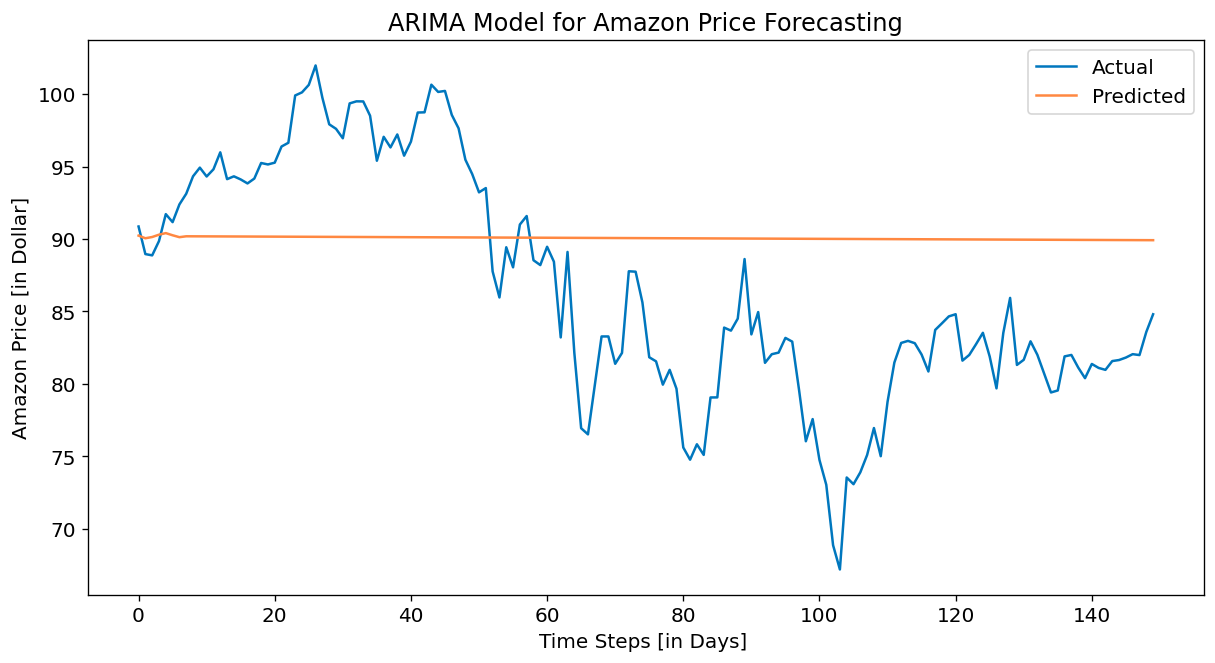

In [23]:
# Here we're plotting Test and Predicted data

plt.figure(figsize = (12, 6))
plt.rcParams.update({'font.size': 12})
plt.plot(test_data[:150], '#0077be',label = 'Actual')
plt.plot(forecast_result[:], '#ff8841',label = 'Predicted')
plt.title('ARIMA Model for {} Price Forecasting'.format(STOCK))
plt.ylabel('{} Price [in Dollar]'.format(STOCK))
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

In [24]:
data = dataset2['Close'].values
print('Shape of data: ', data.shape)

Shape of data:  (5839,)


In [25]:
# Separating train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Train length:  4671
Shape of Train and Test data:  (4671,) (1168,)


In [26]:
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)
print('Shape of Train and Test data: ', train_data.shape, test_data.shape)

Shape of Train and Test data:  (4671, 1) (1168, 1)


In [27]:
def create_dataset(dataset, lookback):
    dataX, dataY = [], []
    for i in range(len(dataset) - lookback -1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        b = dataset[i+lookback, 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

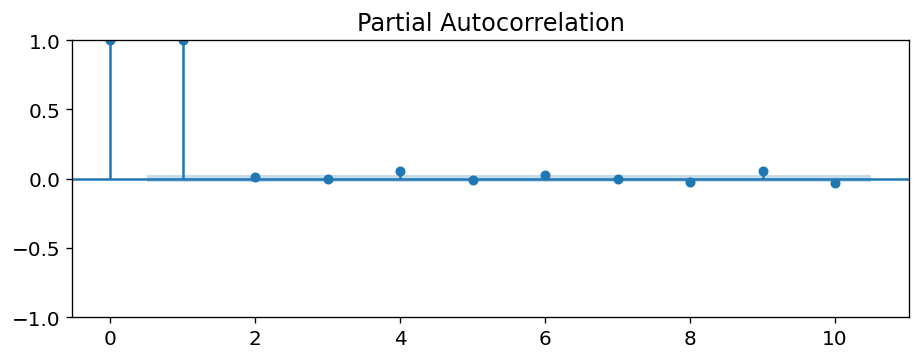

In [28]:
plot_pacf(data, lags = 10)
plt.show()

In [29]:
pacf_value = pacf(data, nlags=20)
lag = 0
# collect lag values greater than 10% correlation 
for x in pacf_value:
    if x > 0.1:
        lag += 1
    else:
        break
print('Selected look_back (or lag = ): ', lag)

Selected look_back (or lag = ):  2


In [30]:
train_X, train_y = create_dataset(train_data, lag)
test_X, test_y = create_dataset(test_data, lag)

In [31]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (4668, 2) (4668,)
Shape of test_X and test_y:  (1165, 2) (1165,)


In [32]:
np.random.seed(9)

In [33]:
model = Sequential()
model.add(Dense(64, input_dim = lag, activation='relu', name= "1st_hidden"))
# model.add(Dense(64, activation='relu', name = '2nd_hidden'))
model.add(Dense(1, name = 'Output_layer', activation = 'linear'))
# model.add(Activation("linear", name = 'Linear_activation'))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 1st_hidden (Dense)          (None, 64)                192       
                                                                 
 Output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [34]:
epoch_number = 100
batches = 64

history = model.fit(train_X, train_y, epochs = epoch_number, batch_size = batches, verbose = 1, shuffle = False, 
                    validation_split = 0.1)

Epoch 1/100


2023-04-12 15:24:27.497992: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


66/66 [==============================] - 1s 10ms/step - loss: 20.6363 - val_loss: 53.9269
Epoch 2/100
66/66 [==============================] - 0s 7ms/step - loss: 1.5130 - val_loss: 1.1979
Epoch 3/100
66/66 [==============================] - 0s 7ms/step - loss: 0.3325 - val_loss: 2.3982
Epoch 4/100
66/66 [==============================] - 0s 6ms/step - loss: 0.2795 - val_loss: 1.6332
Epoch 5/100
66/66 [==============================] - 0s 6ms/step - loss: 0.1297 - val_loss: 1.3739
Epoch 6/100
66/66 [==============================] - 0s 6ms/step - loss: 0.1506 - val_loss: 1.4091
Epoch 7/100
66/66 [==============================] - 0s 6ms/step - loss: 0.1084 - val_loss: 1.0411
Epoch 8/100
66/66 [==============================] - 0s 6ms/step - loss: 0.1134 - val_loss: 1.2192
Epoch 9/100
66/66 [==============================] - 0s 6ms/step - loss: 0.0982 - val_loss: 1.1431
Epoch 10/100
66/66 [==============================] - 0s 6ms/step - loss: 0.0917 - val_loss: 1.1111
Epoch 11/100
66/66

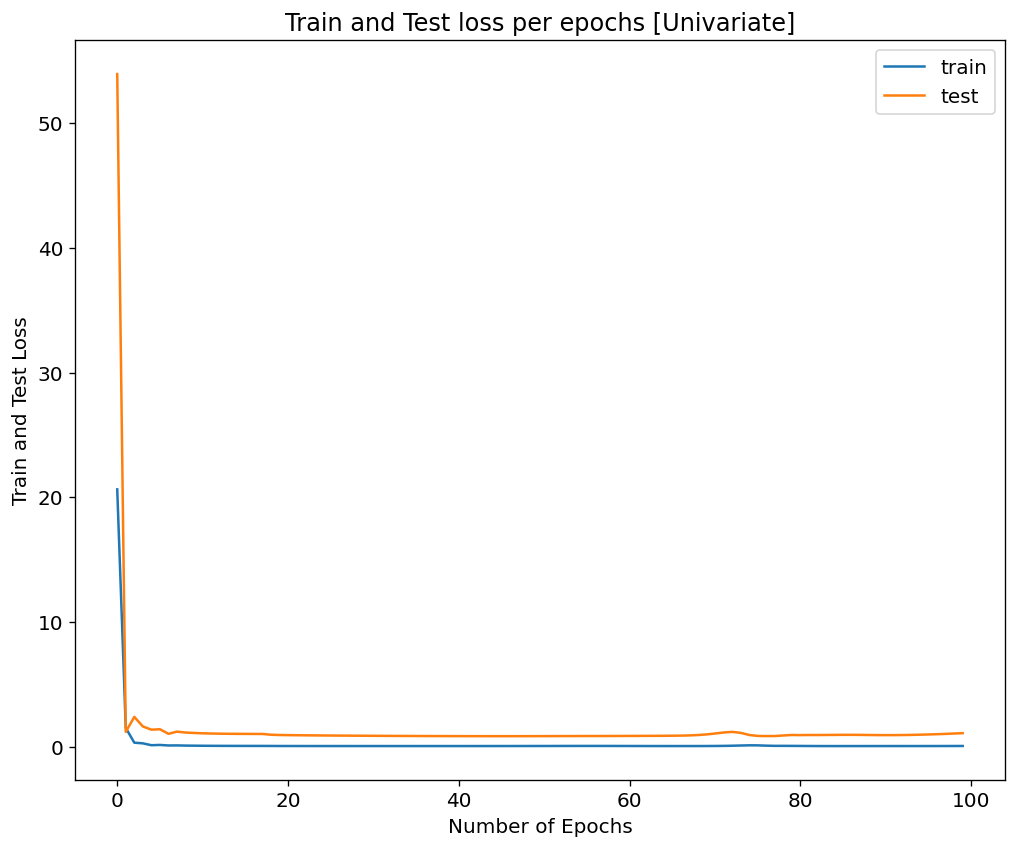

In [35]:
# plot history
plt.clf
plt.figure(figsize = (10,8))
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.xlabel('Number of Epochs')
plt.ylabel('Train and Test Loss')
plt.title('Train and Test loss per epochs [Univariate]')
plt.legend()
plt.show()

In [36]:
# Make prediction
testPredict = model.predict(test_X)
predicted_value = testPredict[:, 0]

37/37 [==============================] - 0s 2ms/step


In [37]:
def evaluate_forecast_results(actual, predicted):
    print('R2 Score: ', round(r2_score(actual, predicted), 2))
    print('MAE : ', round(mae(actual, predicted), 2))
    print('MSE: ', round(mean_squared_error(actual,predicted), 2))
    print('RMSE: ', round(math.sqrt(mean_squared_error(actual,predicted)), 2))
    print('NRMSE: ', NRMSE(actual, predicted))
    print('WMAPE: ', WMAPE(actual, predicted))
    
def NRMSE(actual, predicted):
    rmse = math.sqrt(mean_squared_error(actual,predicted))
    nrmse = rmse / np.mean(actual)
    return round(nrmse, 4)

def WMAPE(actual, predicted):
    abs_error = np.sum(actual - predicted)
    wmape = abs_error / np.sum(actual)
    return round(wmape, 4)

In [38]:
evaluate_forecast_results(test_y, predicted_value)

R2 Score:  0.99
MAE :  2.52
MSE:  11.19
RMSE:  3.34
NRMSE:  0.027
WMAPE:  0.0133


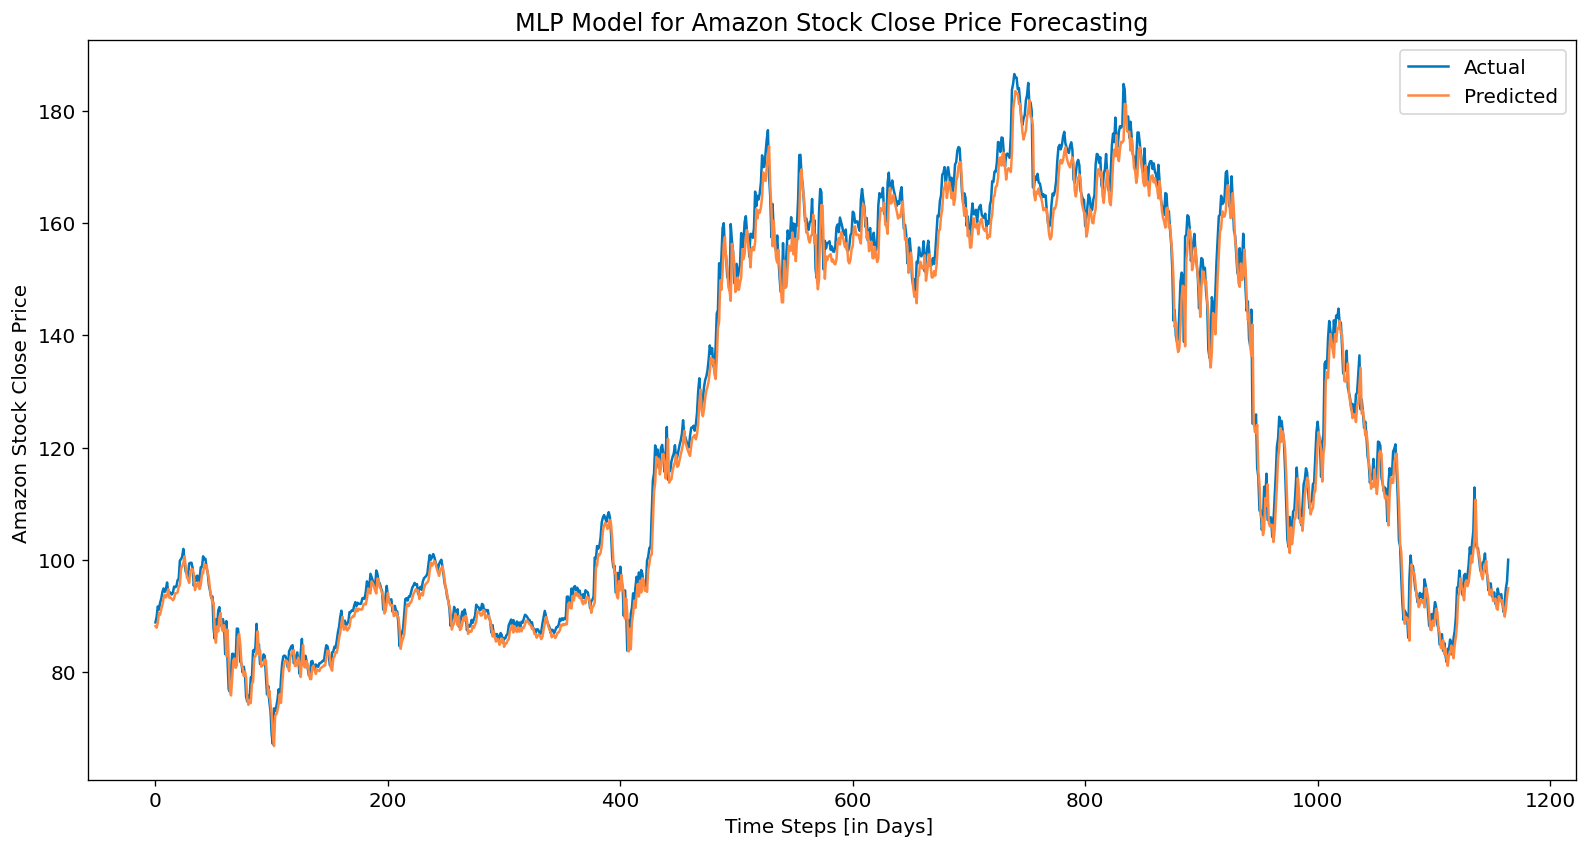

In [41]:
plt.figure(figsize = (16, 8))
plt.rcParams.update({'font.size': 12})
plt.plot(test_y[:], '#0077be', label = 'Actual')
plt.plot(predicted_value, '#ff8841', label = 'Predicted')
plt.title('MLP Model for {} Stock Close Price Forecasting'.format(STOCK))
plt.ylabel('{} Stock Close Price '.format(STOCK))
plt.xlabel('Time Steps [in Days] ')
plt.legend()
plt.show()

In [42]:
data = dataset2['Close'].values
print('Shape of data: ', data.shape)

Shape of data:  (5839,)


In [43]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)

train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  4671
Shape of Train and Test data:  4671 1168


In [44]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [45]:
pacf_value = pacf(data, nlags=20)
lag = 0
# collect lag values greater than 10% correlation 
for x in pacf_value:
    if x > 0.1:
        lag += 1
    else:
        break
print('Selected look_back (or lag = ): ', lag)

Selected look_back (or lag = ):  2


In [46]:
n_features = 1

In [47]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

In [48]:
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (4669, 2) (4669,)
Shape of test_X and test_y:  (1166, 2) (1166,)


In [49]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

In [50]:
# New shape of train_X and test_X are :-
print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (4669, 2, 1) (4669,)
Shape of test_X and test_y:  (1166, 2, 1) (1166,)


In [51]:
# define model
model = Sequential()
model.add(SimpleRNN(64, activation='relu', return_sequences = False, input_shape = (lag, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [52]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [53]:
# fit model
cb = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 15, restore_best_weights = True)
history = model.fit(train_X, train_y, epochs = 150, batch_size = 64, verbose = 1, validation_split = 0.1, 
                   callbacks = [cb])

Epoch 1/150
66/66 [==============================] - 3s 41ms/step - loss: 72.3876 - val_loss: 2.5611
Epoch 2/150
66/66 [==============================] - 2s 35ms/step - loss: 0.1850 - val_loss: 1.7603
Epoch 3/150
66/66 [==============================] - 2s 31ms/step - loss: 0.1043 - val_loss: 1.5098
Epoch 4/150
66/66 [==============================] - 2s 30ms/step - loss: 0.0921 - val_loss: 1.3380
Epoch 5/150
66/66 [==============================] - 2s 31ms/step - loss: 0.0952 - val_loss: 1.3704
Epoch 6/150
66/66 [==============================] - 2s 33ms/step - loss: 0.0919 - val_loss: 1.6175
Epoch 7/150
66/66 [==============================] - 2s 34ms/step - loss: 0.0914 - val_loss: 1.4763
Epoch 8/150
66/66 [==============================] - 2s 36ms/step - loss: 0.0910 - val_loss: 1.4540
Epoch 9/150
66/66 [==============================] - 2s 34ms/step - loss: 0.0897 - val_loss: 1.4690
Epoch 10/150
66/66 [==============================] - 2s 29ms/step - loss: 0.0900 - val_loss: 1.423

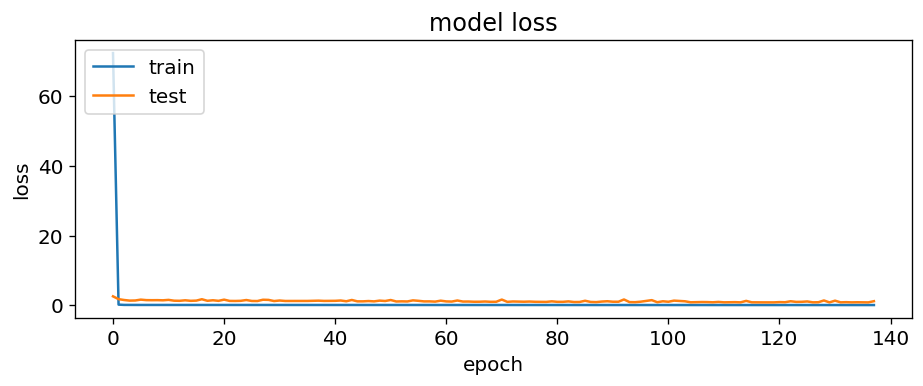

In [54]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [55]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

37/37 [==============================] - 1s 13ms/step
Shape of train and test predict:  (4669, 1) (1166, 1)


In [56]:
actual_ = test_y
predicted_ = test_predict[:, 0]
len(actual_), len(predicted_)

(1166, 1166)

In [57]:
evaluate_forecast_results(actual_, predicted_)

R2 Score:  0.99
MAE :  2.23
MSE:  9.24
RMSE:  3.04
NRMSE:  0.0245
WMAPE:  0.0074


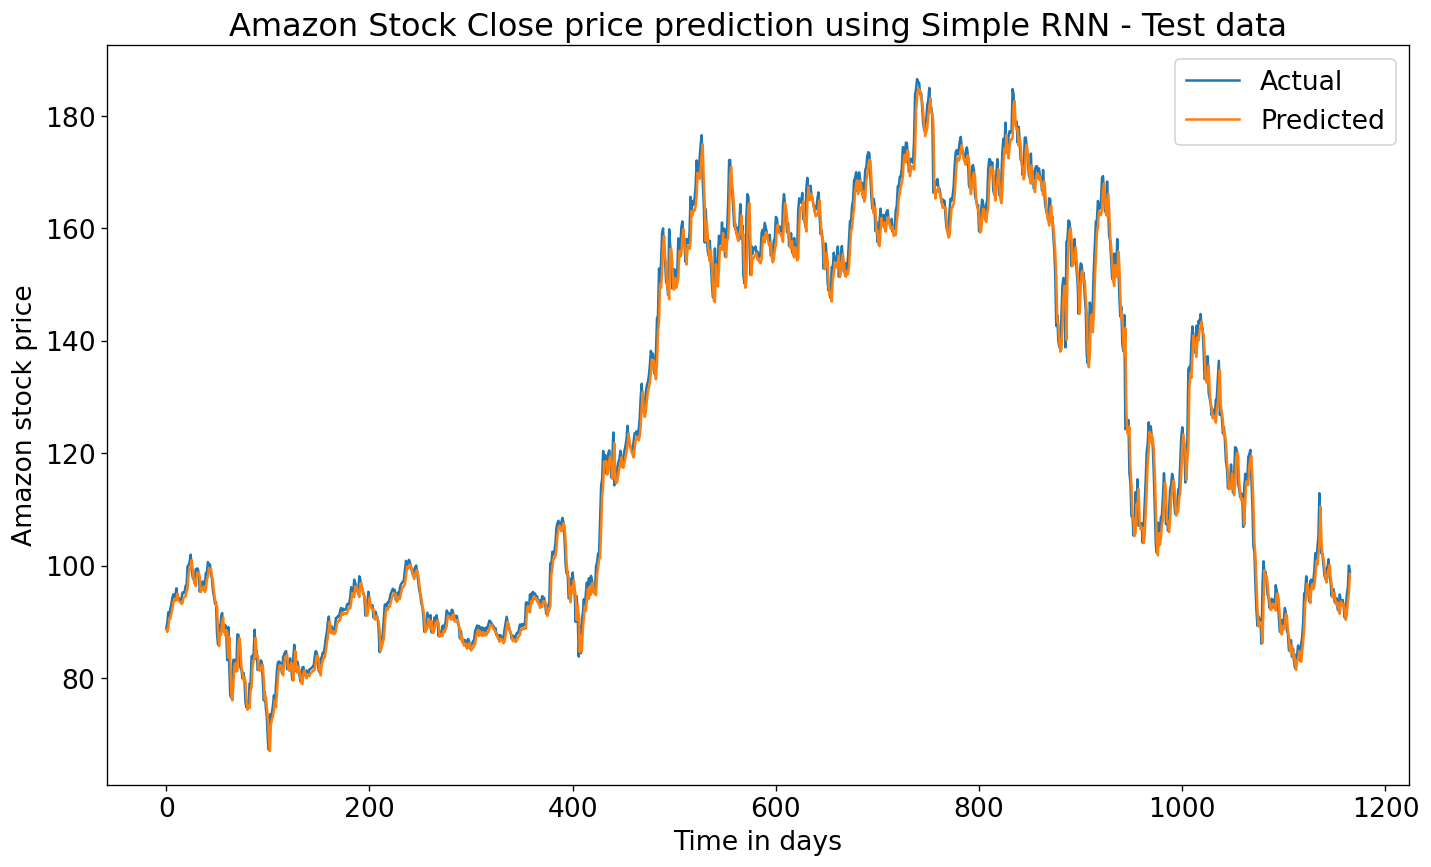

In [58]:
plt.rc("figure", figsize = (14,8))
plt.rcParams.update({'font.size': 16})
plt.plot(actual_, label = 'Actual')
plt.plot(predicted_, label = 'Predicted')
plt.xlabel('Time in days')
plt.ylabel('{} stock price'.format(STOCK))
plt.title('{} Stock Close price prediction using Simple RNN - Test data'.format(STOCK))
plt.legend()
plt.show()

In [59]:
df_train = pd.DataFrame(columns = ['Train data'])
df_train['Train data'] = train_data

df = pd.DataFrame(columns = ['Test data', 'Predicted data'])
df['Test data'] = actual_
df['Predicted data'] = predicted_

total_len = len(df_train['Train data']) + len(df['Test data'])
range(len(df_train['Train data']), total_len)
x_list = [x for x in range(len(df_train['Train data']), total_len)]
df.index = x_list

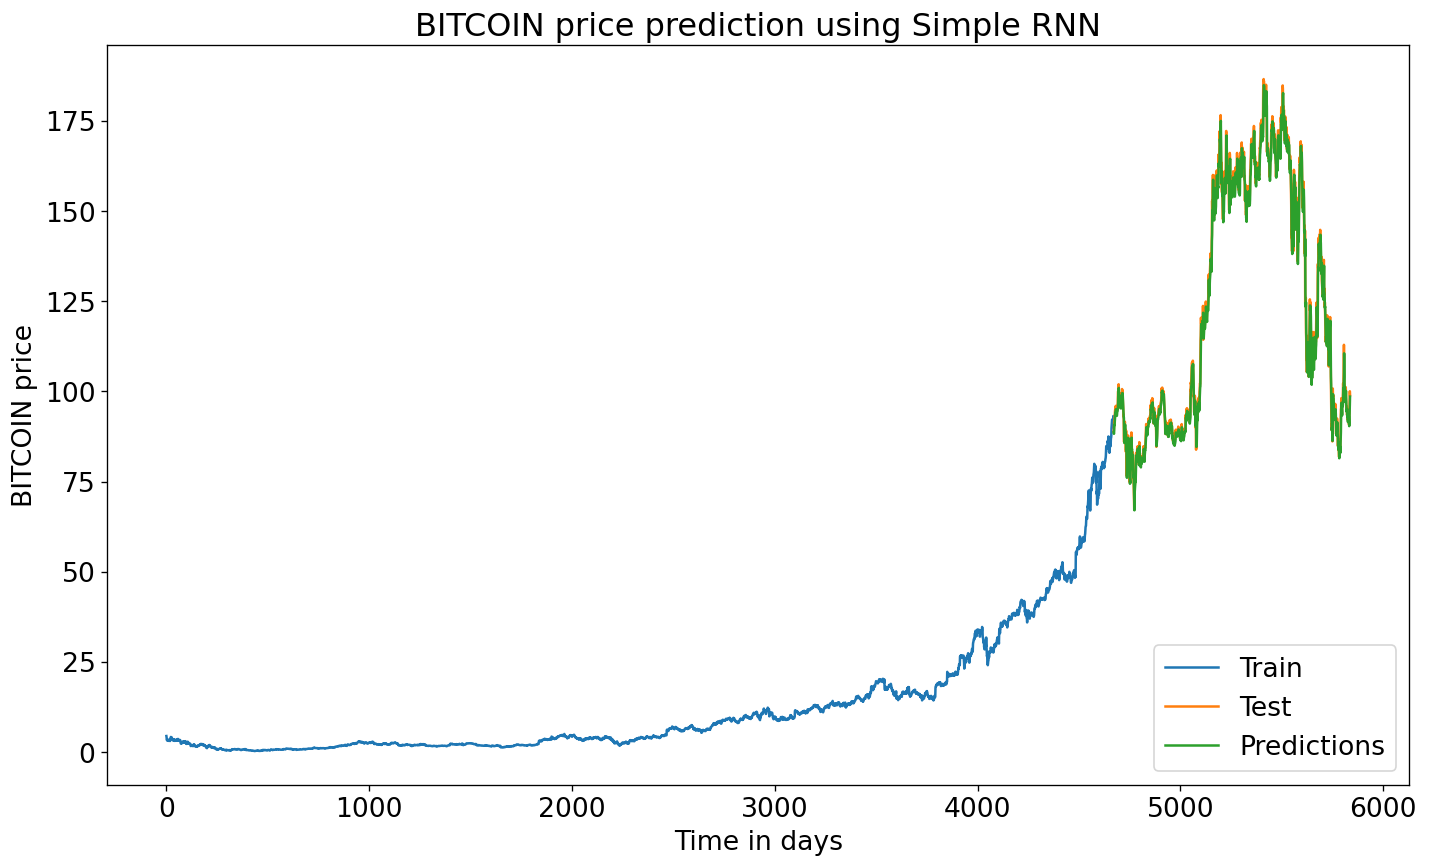

In [60]:
plt.rc("figure", figsize=(14,8))
plt.rcParams.update({'font.size': 16})
plt.xlabel('Time in days')
plt.ylabel('BITCOIN price')
plt.title('BITCOIN price prediction using Simple RNN')
plt.plot(df_train['Train data'])
plt.plot(df[['Test data', 'Predicted data']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [61]:
data = dataset2['Close'].values
print('Shape of data: ', data.shape)

Shape of data:  (5839,)


In [62]:
# Separate train and test data
train_length = int(len(data) * 0.8)
print('Train length: ', train_length)
train_data, test_data = data[:train_length], data[train_length:]
print('Shape of Train and Test data: ', len(train_data), len(test_data))

Train length:  4671
Shape of Train and Test data:  4671 1168


In [63]:
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [64]:
lag = 2  
n_features = 1

In [65]:
train_X, train_y = split_sequence(train_data, lag)
test_X, test_y = split_sequence(test_data, lag)

print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (4669, 2) (4669,)
Shape of test_X and test_y:  (1166, 2) (1166,)


In [66]:
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))

print('Shape of train_X and train_y: ', train_X.shape, train_y.shape)
print('Shape of test_X and test_y: ', test_X.shape, test_y.shape)

Shape of train_X and train_y:  (4669, 2, 1) (4669,)
Shape of test_X and test_y:  (1166, 2, 1) (1166,)


In [67]:
model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences = True, input_shape = (lag, n_features)))
model.add(LSTM(64, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 64)             16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,985
Trainable params: 49,985
Non-trainable params: 0
_________________________________________________________________


In [68]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [69]:
cb = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 15, restore_best_weights = True)
history = model.fit(train_X, train_y, epochs = 150, batch_size = 64, verbose = 1, validation_split =  0.1, 
                   callbacks = [cb])

Epoch 1/150
66/66 [==============================] - 4s 65ms/step - loss: 42.3257 - val_loss: 3.6074
Epoch 2/150
66/66 [==============================] - 5s 74ms/step - loss: 0.8899 - val_loss: 4.4201
Epoch 3/150
66/66 [==============================] - 5s 72ms/step - loss: 0.2370 - val_loss: 1.7594
Epoch 4/150
66/66 [==============================] - 5s 77ms/step - loss: 0.1141 - val_loss: 2.5389
Epoch 5/150
66/66 [==============================] - 5s 69ms/step - loss: 0.1049 - val_loss: 1.8646
Epoch 6/150
66/66 [==============================] - 5s 70ms/step - loss: 0.1017 - val_loss: 2.4825
Epoch 7/150
66/66 [==============================] - 5s 69ms/step - loss: 0.0950 - val_loss: 1.5095
Epoch 8/150
66/66 [==============================] - 5s 74ms/step - loss: 0.0947 - val_loss: 1.4575
Epoch 9/150
66/66 [==============================] - 5s 73ms/step - loss: 0.0966 - val_loss: 1.3539
Epoch 10/150
66/66 [==============================] - 4s 68ms/step - loss: 0.0987 - val_loss: 1.322

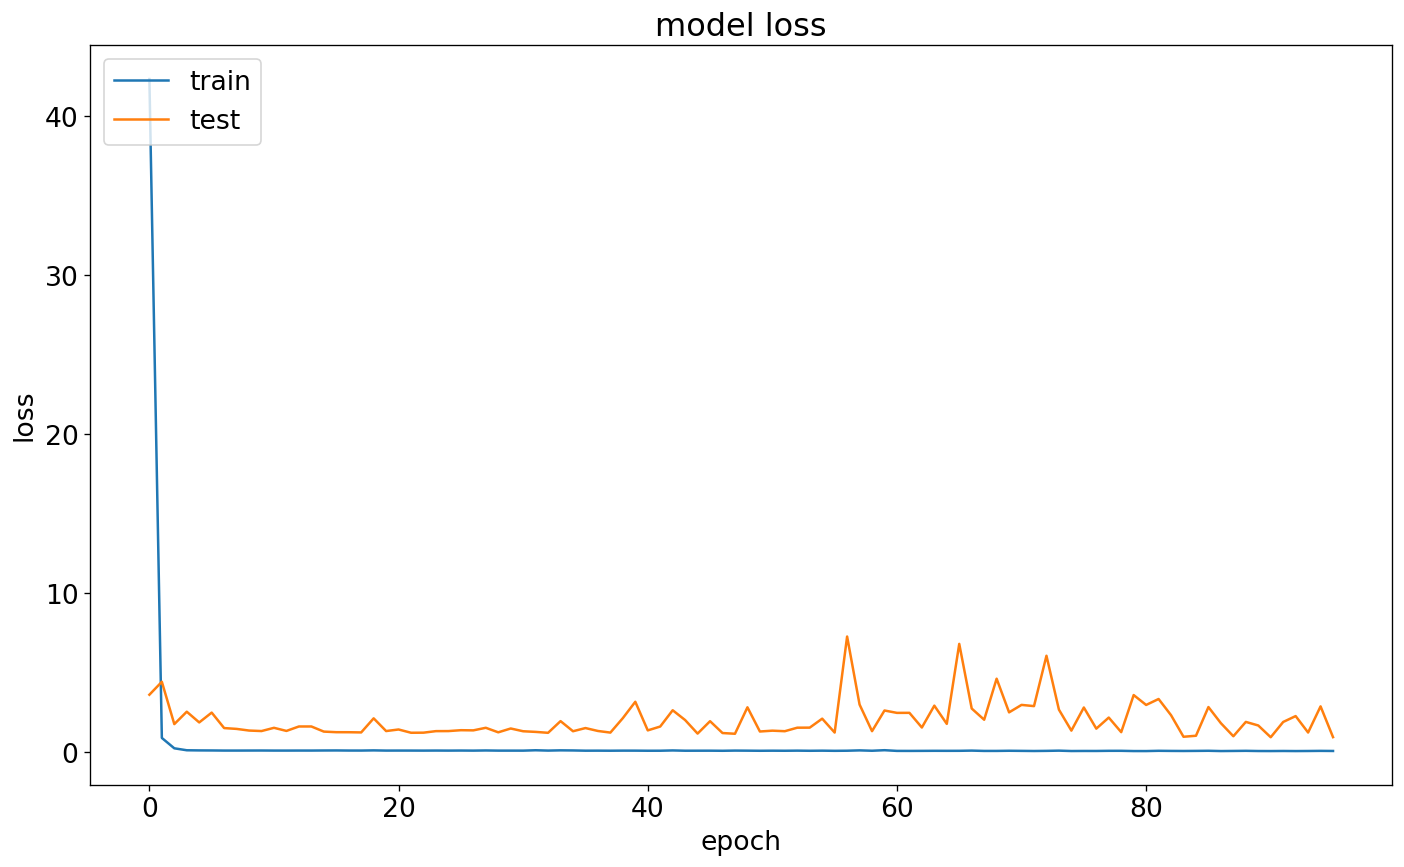

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [71]:
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

print('Shape of train and test predict: ', train_predict.shape, test_predict.shape)

37/37 [==============================] - 1s 31ms/step
Shape of train and test predict:  (4669, 1) (1166, 1)


In [72]:
actual_lstm = test_y
predicted_lstm = test_predict[:, 0]
evaluate_forecast_results(actual_lstm, predicted_lstm)

R2 Score:  0.98
MAE :  4.54
MSE:  28.35
RMSE:  5.32
NRMSE:  0.0429
WMAPE:  0.0346


In [73]:
df_train = pd.DataFrame(columns = ['Train data'])
df_train['Train data'] = train_data

df = pd.DataFrame(columns = ['Test data', 'Predicted data'])
df['Test data'] = actual_lstm
df['Predicted data'] = predicted_lstm

total_len = len(df_train['Train data']) + len(df['Test data'])
range(len(df_train['Train data']), total_len)
x_list = [x for x in range(len(df_train['Train data']), total_len)]
df.index = x_list

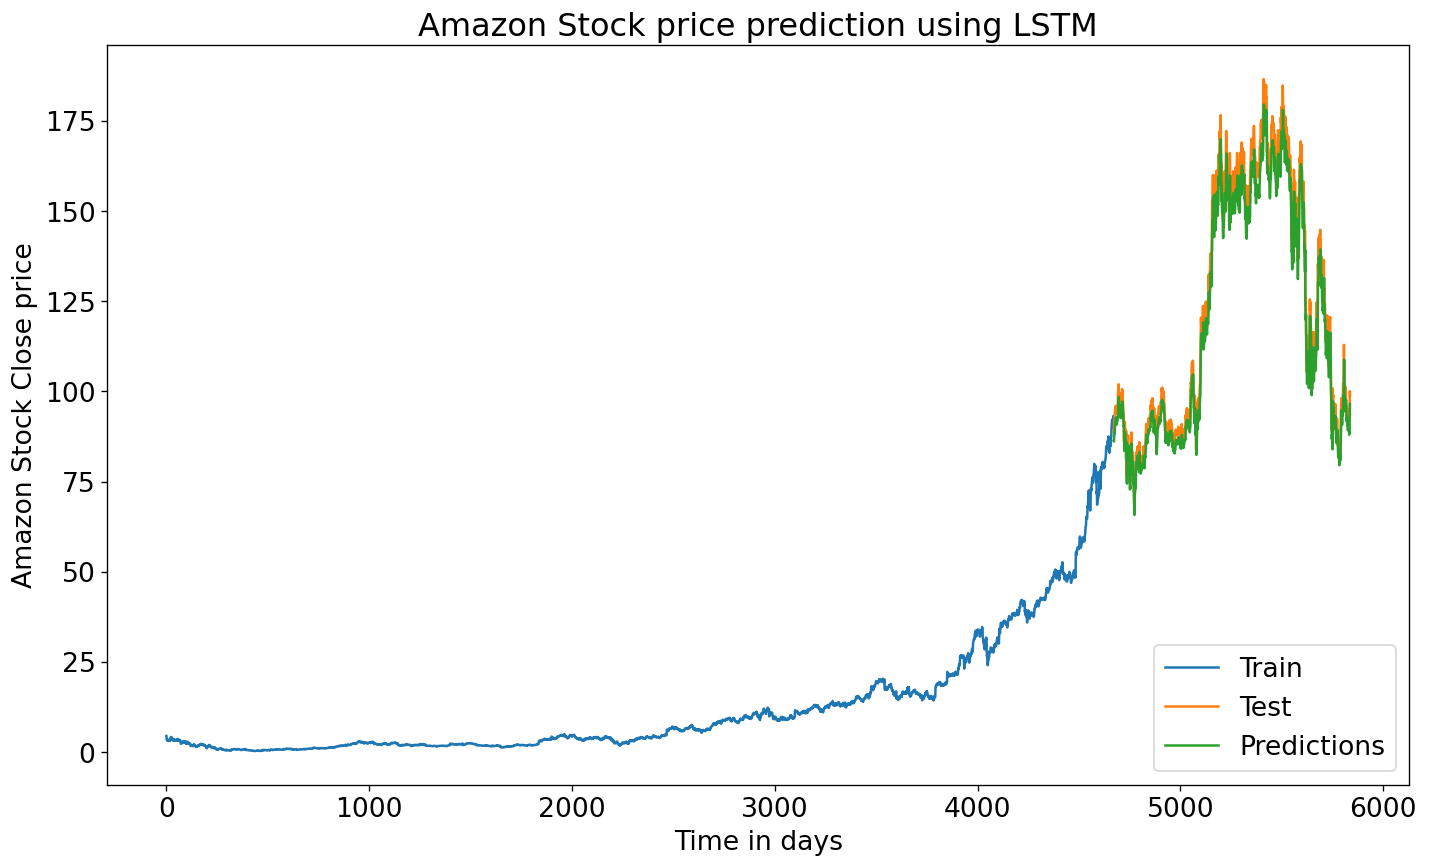

In [74]:
plt.rc("figure", figsize = (14,8))
plt.rcParams.update({'font.size': 16})
plt.xlabel('Time in days')
plt.ylabel('{} Stock Close price'.format(STOCK))
plt.title('{} Stock price prediction using LSTM'.format(STOCK))
plt.plot(df_train['Train data'])
plt.plot(df[['Test data', 'Predicted data']])
plt.legend(['Train', 'Test', 'Predictions'], loc = 'lower right')
plt.show()